In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import heapq as hp
from pandas import DataFrame
from heapq import nlargest

In [42]:
df1 = pd.read_csv('Superstore Sales Dataset.csv')

In [43]:
df1 = DataFrame(df1)

In [44]:
df = df1.copy()

In [ ]:
# EDA Exploatory Data Analytics

In [45]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1358,1359,CA-2018-160045,26/04/2018,27/04/2018,First Class,LB-16735,Larry Blacks,Consumer,United States,Fort Worth,Texas,76106.0,Central,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",1.988
1081,1082,CA-2016-110016,29/11/2016,04/12/2016,Standard Class,BT-11395,Bill Tyler,Corporate,United States,Detroit,Michigan,48227.0,Central,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",1106.910
4087,4088,CA-2017-111913,04/08/2017,06/08/2017,Second Class,LC-16930,Linda Cazamias,Corporate,United States,Sacramento,California,95823.0,West,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",11.784
2915,2916,CA-2016-134747,12/10/2016,17/10/2016,Second Class,DL-12925,Daniel Lacy,Consumer,United States,Noblesville,Indiana,46060.0,Central,OFF-BI-10001308,Office Supplies,Binders,GBC Standard Plastic Binding Systems' Combs,12.560
1642,1643,US-2015-134712,29/11/2015,04/12/2015,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Skokie,Illinois,60076.0,Central,OFF-FA-10003112,Office Supplies,Fasteners,Staples,12.624
6919,6920,CA-2016-102806,21/05/2016,28/05/2016,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",24.588
316,317,CA-2015-164259,28/12/2015,30/12/2015,First Class,SP-20860,Sung Pak,Corporate,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003373,Office Supplies,Art,"Boston School Pro Electric Pencil Sharpener, 1670",99.136
5002,5003,CA-2017-136126,24/05/2017,24/05/2017,Same Day,EH-14125,Eugene Hildebrand,Home Office,United States,Newport News,Virginia,23602.0,South,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,191.600
6177,6178,CA-2016-158421,21/09/2016,26/09/2016,Standard Class,GB-14575,Giulietta Baptist,Consumer,United States,Columbia,South Carolina,29203.0,South,OFF-EN-10001453,Office Supplies,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",121.960
2456,2457,CA-2018-140949,17/03/2018,22/03/2018,Second Class,DB-13405,Denny Blanton,Consumer,United States,New York City,New York,10011.0,East,OFF-LA-10004093,Office Supplies,Labels,Avery 486,7.310


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [47]:
missing_value = df[df['Postal Code'].isna()]
print(missing_value)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
2234    2235  CA-2018-104066  05/12/2018  10/12/2018  Standard Class   
5274    5275  CA-2016-162887  07/11/2016  09/11/2016    Second Class   
8798    8799  US-2017-150140  06/04/2017  10/04/2017  Standard Class   
9146    9147  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9147    9148  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9148    9149  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9386    9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9387    9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9388    9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9389    9390  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9741    9742  CA-2016-117086  08/11/2016  12/11/2016  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United S

In [48]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

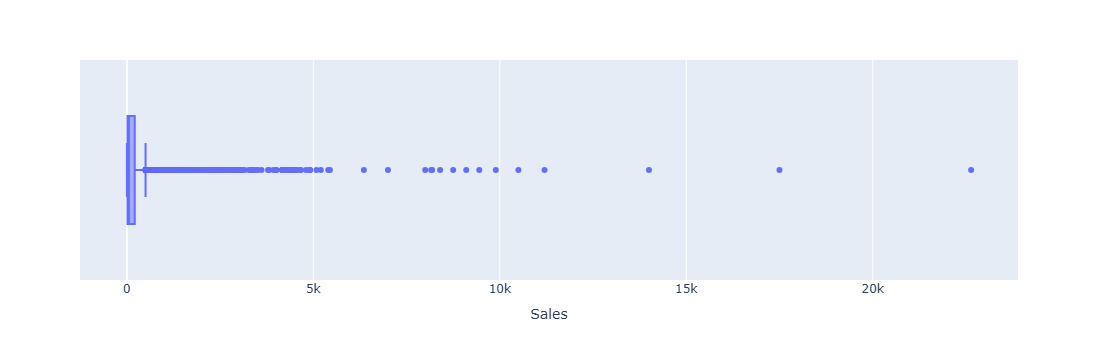

In [49]:
px.box(df, x = 'Sales')

In [50]:
print(df.duplicated().sum())

0


In [51]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [52]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [53]:
df['Country'].unique()

array(['United States'], dtype=object)

In [54]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [55]:
df['City'].nunique()

529

In [56]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [57]:
df['State'].nunique()

49

In [58]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [59]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [60]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
# Data Cleaning ( Preproessing)

In [61]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format = '%d/%m/%Y')

In [62]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format = '%d/%m/%Y')

In [63]:
df = df.drop(['Row ID','Postal Code'], axis=1)

In [64]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [65]:
IQR = 210.605000 - 17.248000
lower_boundary = 17.248000 - (1.5 * IQR)
upper_boundary = 210.605000 + (1.5 * IQR)
print(lower_boundary)
print(upper_boundary)
df = df[(df['Sales'] >= lower_boundary) & (df['Sales'] <= upper_boundary)]

-272.7875
500.6405


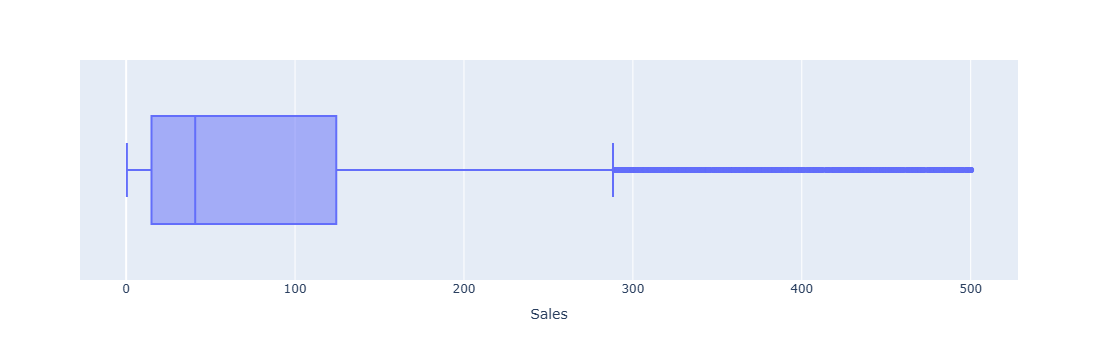

In [66]:
px.box(df, x = 'Sales')

In [67]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [68]:
df['Year'] = df['Order Date'].dt.year

In [69]:
df['Month'] = df['Order Date'].dt.month_name()

In [70]:
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,Year,Month
5757,CA-2016-119634,2016-08-11,2016-08-16,Standard Class,BW-11065,Barry Weirich,Consumer,United States,Raleigh,North Carolina,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",46.152,5,2016,August
7981,CA-2015-113383,2015-09-10,2015-09-13,First Class,SF-20065,Sandra Flanagan,Consumer,United States,Clifton,New Jersey,East,OFF-AP-10004532,Office Supplies,Appliances,Kensington 6 Outlet Guardian Standard Surge Pr...,81.920,3,2015,September
6638,CA-2018-103352,2018-11-27,2018-11-30,Second Class,RP-19390,Resi Pölking,Consumer,United States,New York City,New York,East,OFF-BI-10001196,Office Supplies,Binders,"Avery Flip-Chart Easel Binder, Black",107.424,3,2018,November
8853,US-2016-115343,2016-09-22,2016-09-25,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,3,2016,September
1228,CA-2018-100013,2018-11-06,2018-11-11,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Los Angeles,California,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",15.280,5,2018,November


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8655 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           8655 non-null   object        
 1   Order Date         8655 non-null   datetime64[ns]
 2   Ship Date          8655 non-null   datetime64[ns]
 3   Ship Mode          8655 non-null   object        
 4   Customer ID        8655 non-null   object        
 5   Customer Name      8655 non-null   object        
 6   Segment            8655 non-null   object        
 7   Country            8655 non-null   object        
 8   City               8655 non-null   object        
 9   State              8655 non-null   object        
 10  Region             8655 non-null   object        
 11  Product ID         8655 non-null   object        
 12  Category           8655 non-null   object        
 13  Sub-Category       8655 non-null   object        
 14  Product Name 

In [72]:
df['Sales'].describe()

count    8655.000000
mean       93.213330
std       114.693292
min         0.444000
25%        15.014000
50%        40.880000
75%       124.382000
max       500.240000
Name: Sales, dtype: float64

In [ ]:
# Data Modeling & Data Visualization

In [73]:
Total_Sales = df['Sales'].sum()
print('Total_Sales = ',Total_Sales)

Total_Sales =  806761.3698


In [74]:
Total_Orders = df['Order ID'].nunique()
print('Total_Orders = ',Total_Orders)

Total_Orders =  4641


In [75]:
No_of_Products = df['Product ID'].nunique()
print('No_of_Products = ',No_of_Products)

No_of_Products =  1769


Region
West       2772
East       2458
Central    2024
South      1401
Name: count, dtype: int64


<Axes: xlabel='Region'>

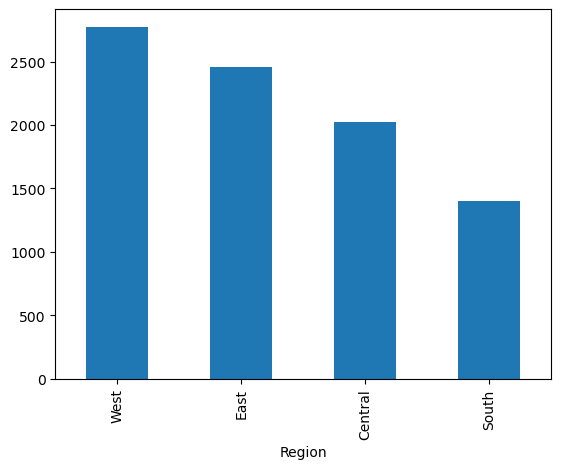

In [138]:
No_of_Orders_OR_Stores_OR_Cities_by_Region = df['Region'].value_counts()
No_of_Orders_OR_Stores_OR_Cities_by_Region = No_of_Orders_OR_Stores_OR_Cities_by_Region.sort_values(ascending = False)
print(No_of_Orders_OR_Stores_OR_Cities_by_Region)
df['Region'].value_counts().plot.bar()

In [77]:
Sum_of_Sales_by_Region = df['Sales'].groupby(df['Region']).sum()
print(Sum_of_Sales_by_Region)

Region
Central    180207.3958
East       229351.9580
South      127524.8815
West       269677.1345
Name: Sales, dtype: float64


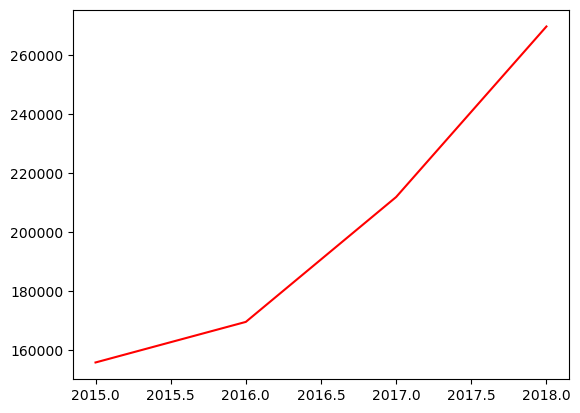

In [78]:
Yera_Over_Year_Sales = df['Sales'].groupby(df['Year']).sum()

plt.plot(Yera_Over_Year_Sales,'r-')

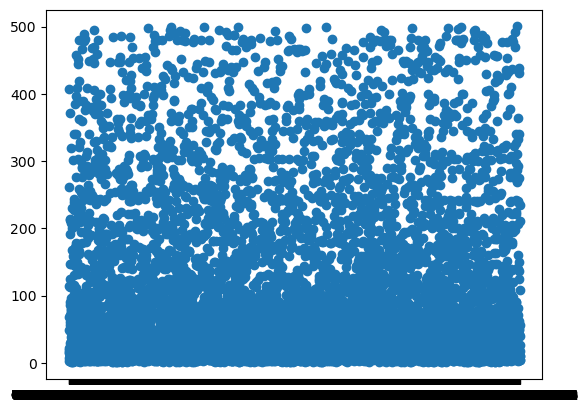

In [79]:
x = df['Order ID']
y = df['Sales']
plt.scatter(x,y)
plt.show()

In [80]:
No_of_Orders_by_Ship_Mode =df['Ship Mode'].value_counts()
print(No_of_Orders_by_Ship_Mode)

Ship Mode
Standard Class    5186
Second Class      1671
First Class       1325
Same Day           473
Name: count, dtype: int64


Year
2015    1703
2016    1799
2017    2246
2018    2907
Name: Order ID, dtype: int64


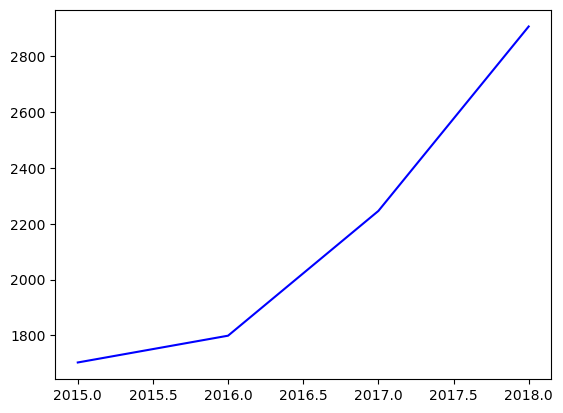

In [113]:
Year_Over_Year_Orders = df['Order ID'].groupby(df['Year']).count()
print(Year_Over_Year_Orders)
plt.plot(Year_Over_Year_Orders,'b-')

Ship Mode
Standard Class    483387.6107
Second Class      158701.6432
First Class       121020.4069
Same Day           43651.7090
Name: Sales, dtype: float64


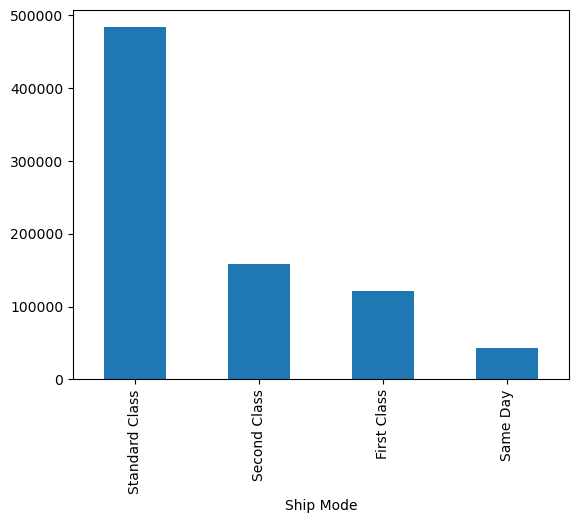

In [137]:
Sum_of_Sales_by_Ship_Mode = df['Sales'].groupby(df['Ship Mode']).sum()
Sum_of_Sales_by_Ship_Mode = Sum_of_Sales_by_Ship_Mode.sort_values(ascending = False)
Sum_of_Sales_by_Ship_Mode.plot.bar()
print(Sum_of_Sales_by_Ship_Mode)

Ship Mode
Same Day          0.048626
First Class       2.177358
Second Class      3.263315
Standard Class    5.010991
Name: Shipping Duration, dtype: float64


<Axes: xlabel='Ship Mode'>

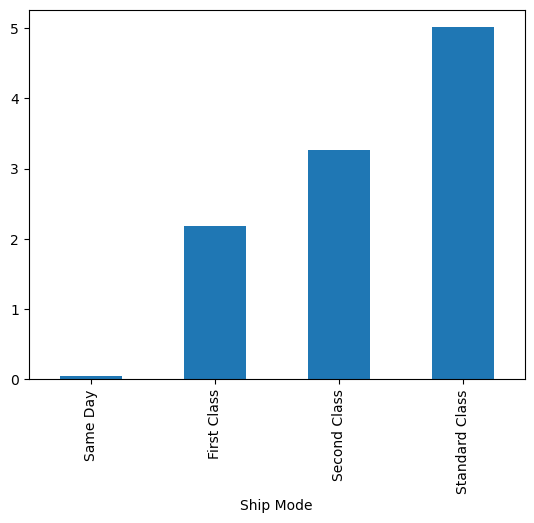

In [145]:
Ship_Mode_by_Shipping_Duration = df['Shipping Duration'].groupby(df['Ship Mode']).mean()
Ship_Mode_by_Shipping_Duration = Ship_Mode_by_Shipping_Duration.sort_values(ascending = True)
print(Ship_Mode_by_Shipping_Duration)
Ship_Mode_by_Shipping_Duration.plot.bar()

Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             369       147           470            1413
Corporate            229        46           275             843
Home Office          131        47           148             523


<Axes: xlabel='Segment'>

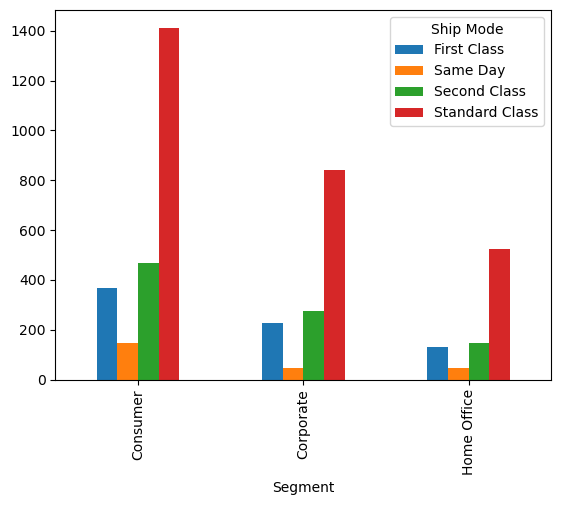

In [214]:
Segment_by_Ship_Mode = pd.pivot_table(df,index = 'Segment', columns = 'Ship Mode', values = 'Order ID', aggfunc = 'nunique')
print(Segment_by_Ship_Mode)
Segment_by_Ship_Mode.plot.bar()

Segment
Consumer       4543
Corporate      2582
Home Office    1530
Name: count, dtype: int64


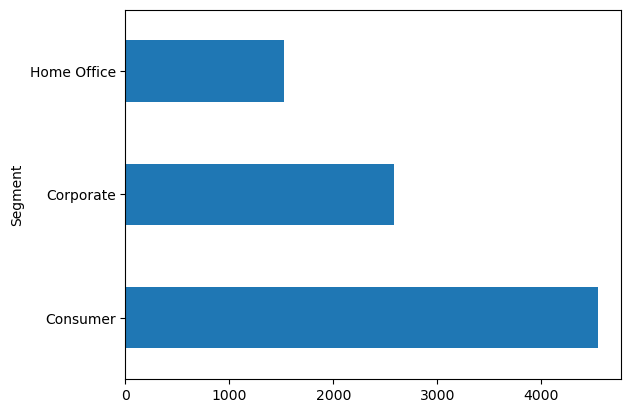

In [146]:
No_of_Orders_by_Segment =df['Segment'].value_counts()
No_of_Orders_by_Segment.plot.barh()
print(No_of_Orders_by_Segment)

Segment
Consumer       431161.0998
Corporate      236416.9998
Home Office    139183.2702
Name: Sales, dtype: float64


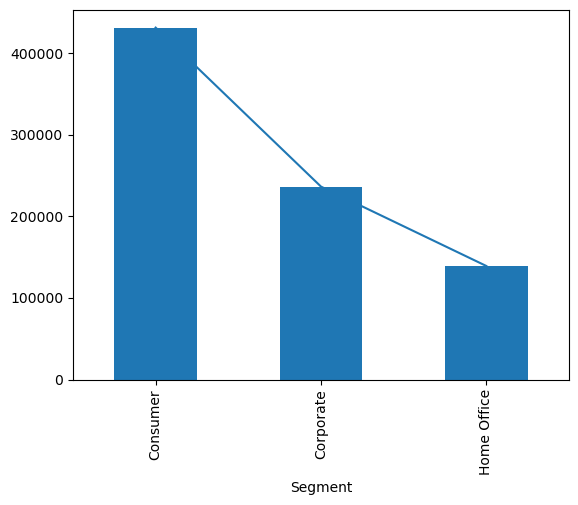

In [117]:
Sum_of_Sales_by_Segment = df['Sales'].groupby(df['Segment']).sum()
plt.plot(Sum_of_Sales_by_Segment)
Sum_of_Sales_by_Segment.plot.bar()
print(Sum_of_Sales_by_Segment)

            Sales
Year             
2015  155727.6401
2016  169491.8460
2017  211845.7333
2018  269696.1504


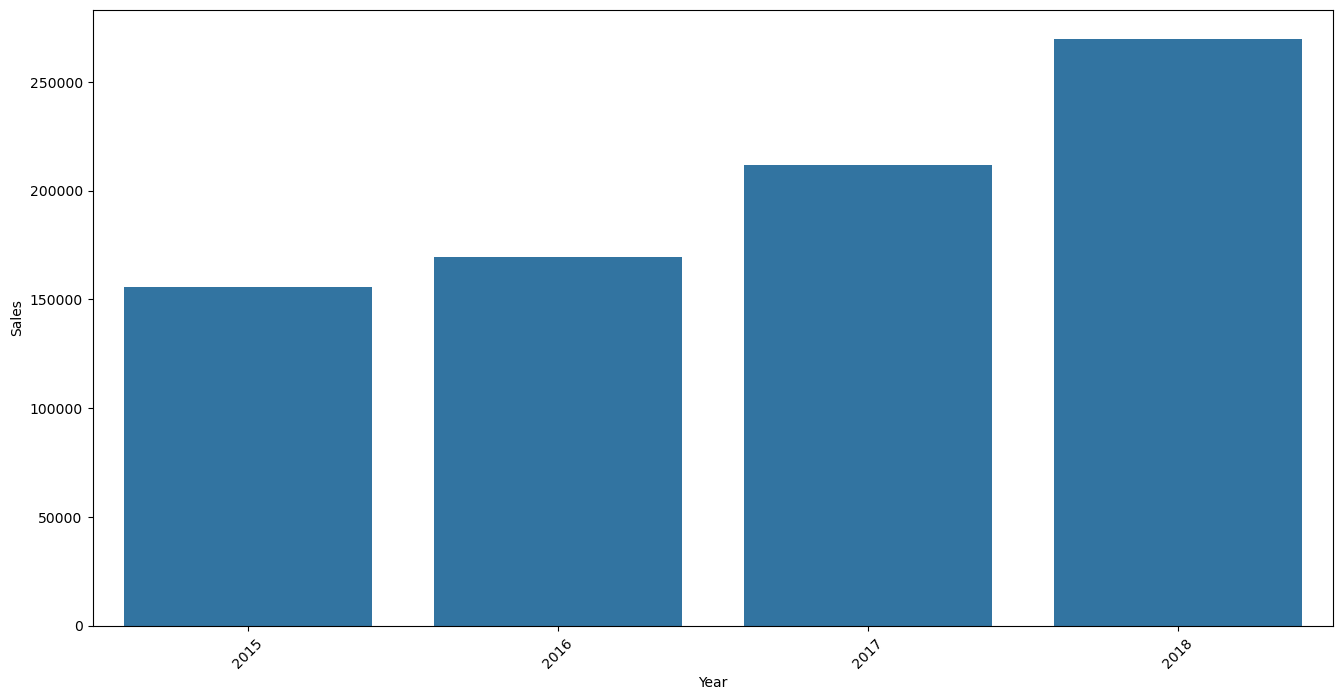

In [121]:
pivot_table = pd.pivot_table(df,index = ['Year'],values='Sales',aggfunc = 'sum')
print(pivot_table)
plt.figure(figsize=(16,8))
sns.barplot(pivot_table, x= 'Year',y= 'Sales')
plt .xticks(rotation=45)
plt.show()

                 Sales
Month                 
April       52525.6681
August      55716.3025
December   116090.2023
February    27569.7344
January     31277.8030
July        59325.4810
June        59031.9188
March       59014.8548
May         57079.8264
November   117716.8140
October     65507.3602
September  105905.4043


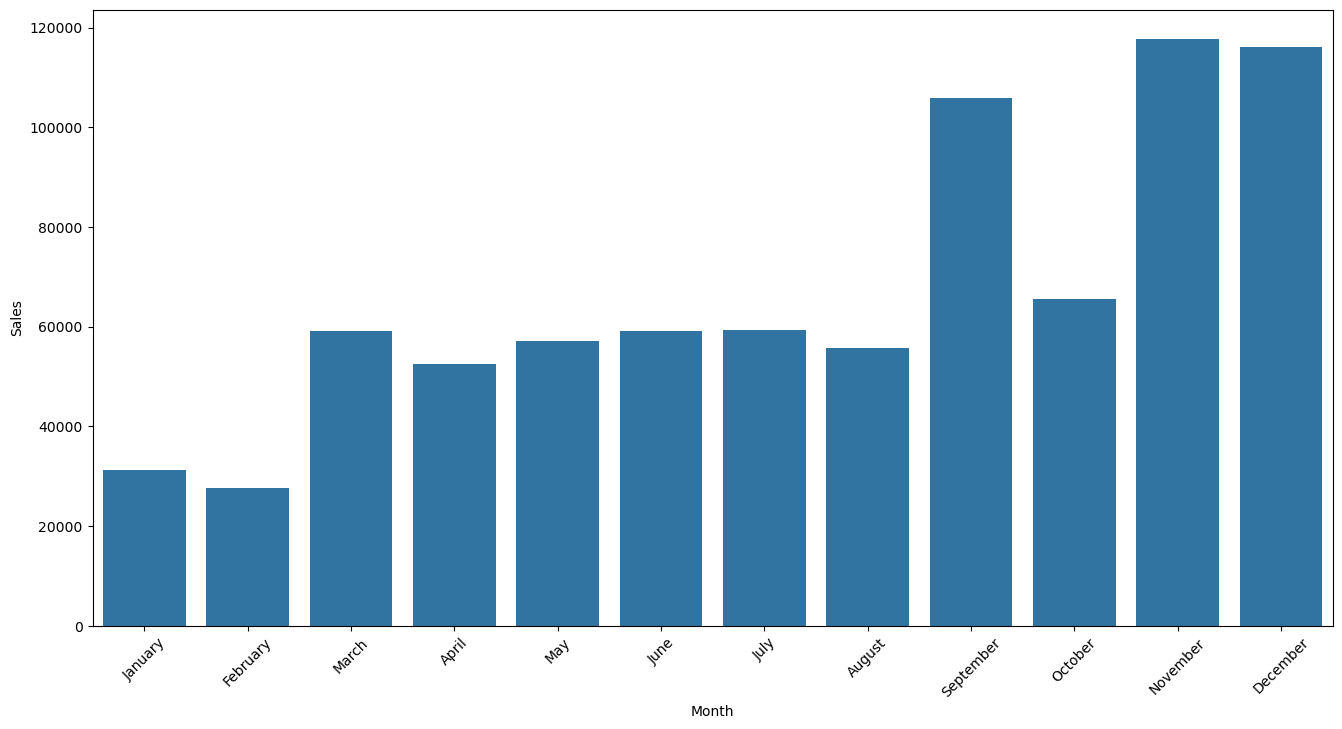

In [148]:
pivot_table = pd.pivot_table(df,index = ['Month'],values='Sales',aggfunc = 'sum')
print(pivot_table)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(pivot_table, x= 'Month',y= 'Sales')
plt .xticks(rotation=45)
plt.show()

Category   Furniture  Office Supplies  Technology
Year                                             
2015      45033.1331        68549.881   42144.626
2016      52498.7010        68220.522   48772.623
2017      64974.9933        87524.392   59346.348
2018      80863.6074       113683.955   75148.588


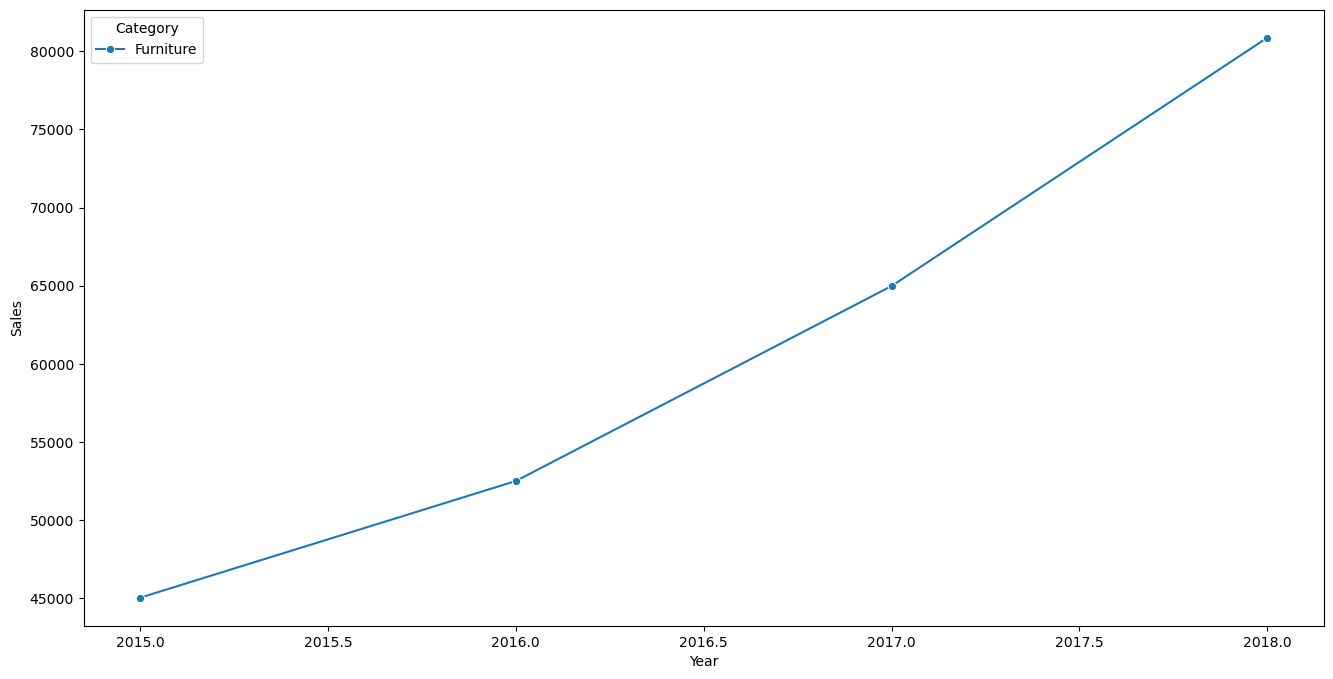

In [134]:
pivot_table = pd.pivot_table(df,index = ['Year'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Year'],value_vars=['Furniture'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Year' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

Category   Furniture  Office Supplies  Technology
Year                                             
2015      45033.1331        68549.881   42144.626
2016      52498.7010        68220.522   48772.623
2017      64974.9933        87524.392   59346.348
2018      80863.6074       113683.955   75148.588


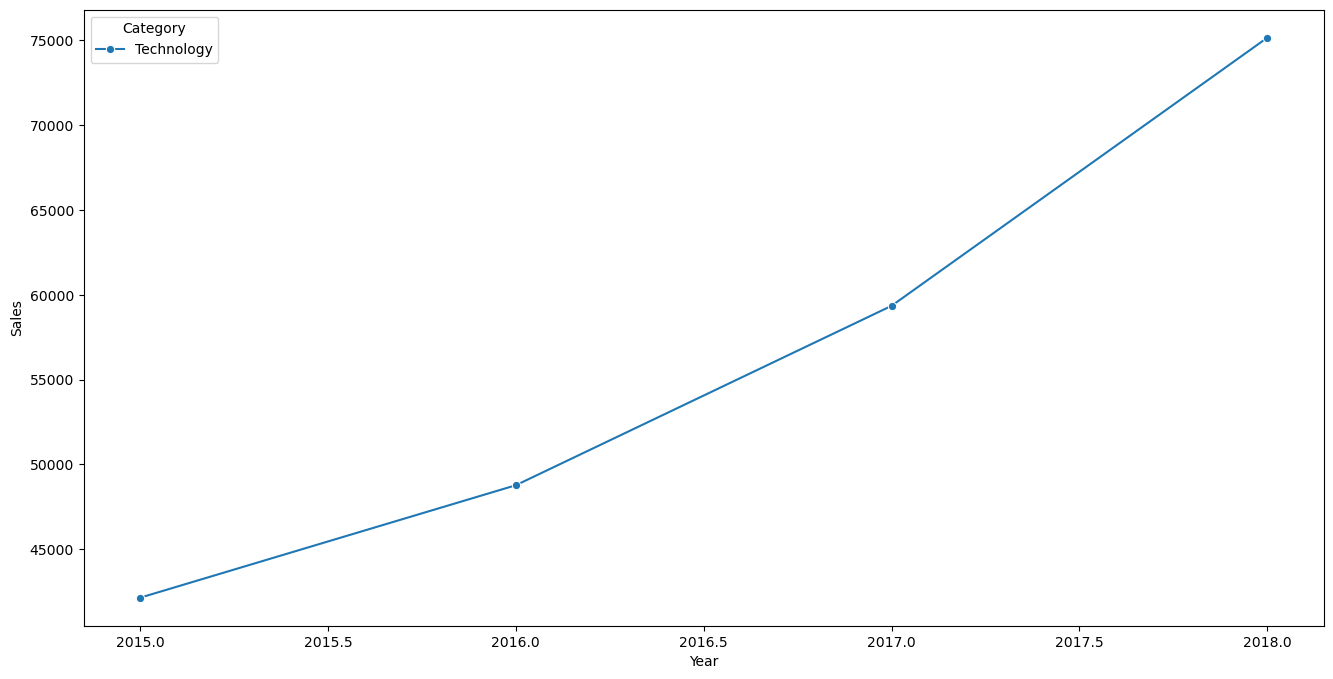

In [133]:
pivot_table = pd.pivot_table(df,index = ['Year'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Year'],value_vars=['Technology'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Year' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

Category   Furniture  Office Supplies  Technology
Year                                             
2015      45033.1331        68549.881   42144.626
2016      52498.7010        68220.522   48772.623
2017      64974.9933        87524.392   59346.348
2018      80863.6074       113683.955   75148.588


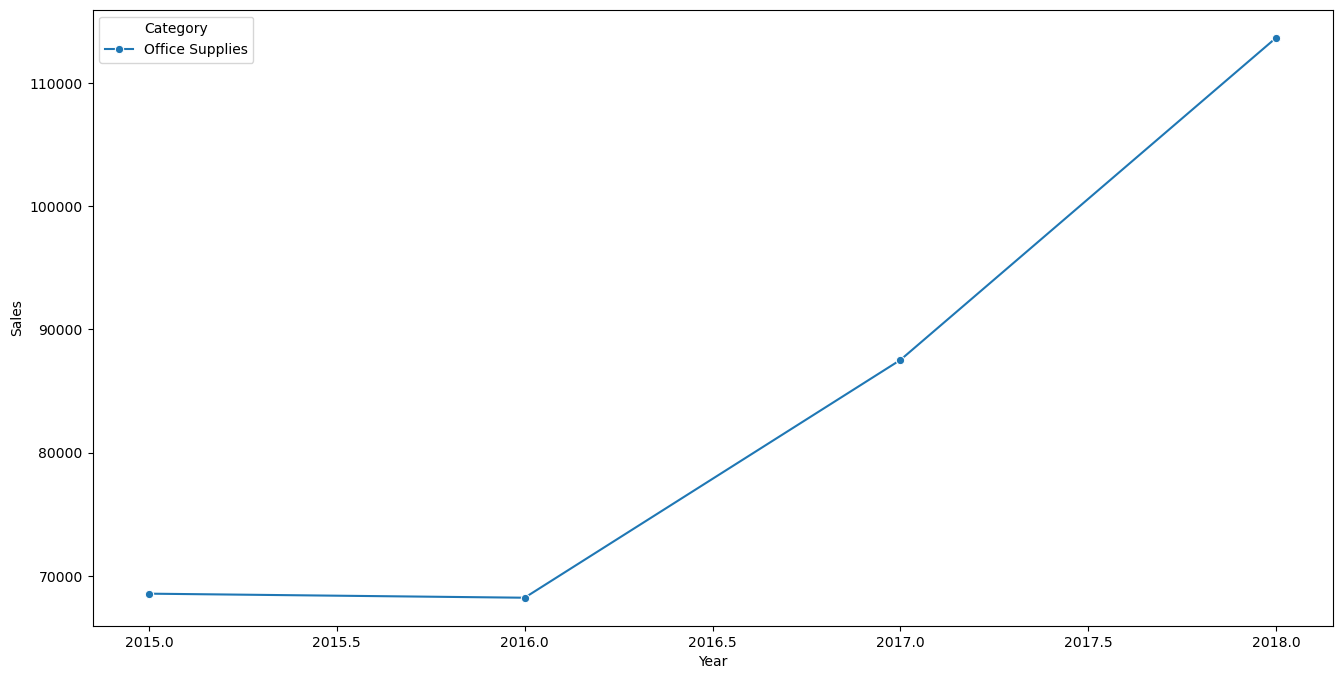

In [132]:
pivot_table = pd.pivot_table(df,index = ['Year'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Year'],value_vars=['Office Supplies'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Year' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

Category    Furniture  Office Supplies  Technology
Month                                             
April      17003.8821        21927.934   13593.852
August     14197.5665        26276.450   15242.286
December   34253.8653        48593.707   33242.630
February    7819.0134        12041.951    7708.770
January    10358.3590        11678.509    9240.935
July       20036.6020        23002.861   16286.018
June       16834.4118        25849.157   16348.350
March      16249.6698        24731.811   18033.374
May        17439.4734        23480.128   16160.225
November   36661.9590        47917.250   33137.605
October    22472.5982        25047.722   17987.040
September  30043.0343        47431.270   28431.100


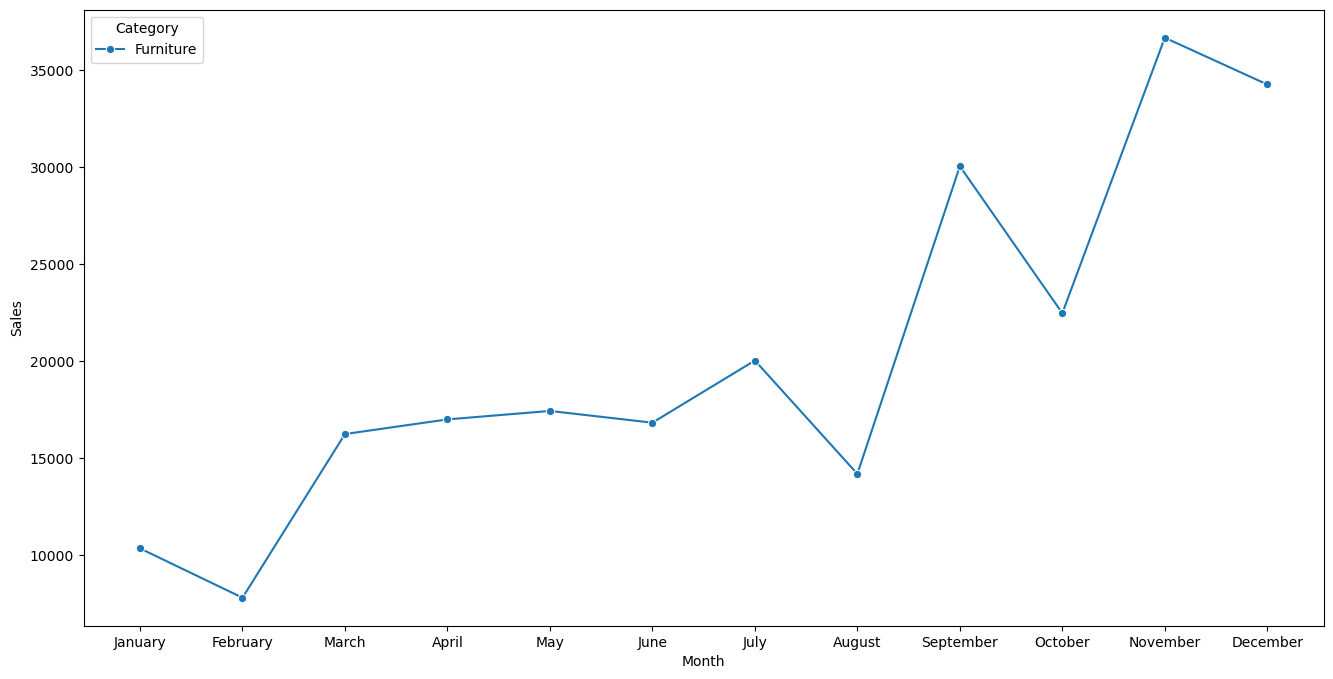

In [131]:
pivot_table = pd.pivot_table(df,index = ['Month'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Month'],value_vars=['Furniture'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Month' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

Category    Furniture  Office Supplies  Technology
Month                                             
April      17003.8821        21927.934   13593.852
August     14197.5665        26276.450   15242.286
December   34253.8653        48593.707   33242.630
February    7819.0134        12041.951    7708.770
January    10358.3590        11678.509    9240.935
July       20036.6020        23002.861   16286.018
June       16834.4118        25849.157   16348.350
March      16249.6698        24731.811   18033.374
May        17439.4734        23480.128   16160.225
November   36661.9590        47917.250   33137.605
October    22472.5982        25047.722   17987.040
September  30043.0343        47431.270   28431.100


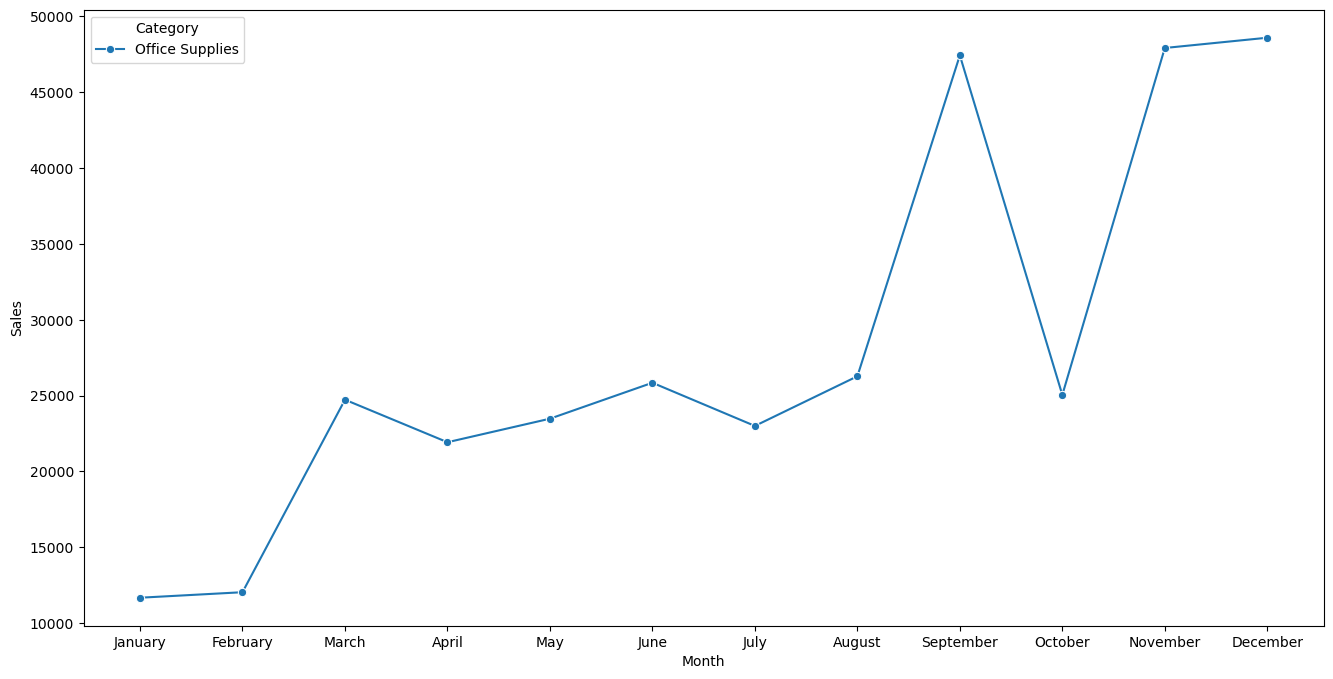

In [130]:
pivot_table = pd.pivot_table(df,index = ['Month'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Month'],value_vars=['Office Supplies'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Month' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

Category    Furniture  Office Supplies  Technology
Month                                             
April      17003.8821        21927.934   13593.852
August     14197.5665        26276.450   15242.286
December   34253.8653        48593.707   33242.630
February    7819.0134        12041.951    7708.770
January    10358.3590        11678.509    9240.935
July       20036.6020        23002.861   16286.018
June       16834.4118        25849.157   16348.350
March      16249.6698        24731.811   18033.374
May        17439.4734        23480.128   16160.225
November   36661.9590        47917.250   33137.605
October    22472.5982        25047.722   17987.040
September  30043.0343        47431.270   28431.100


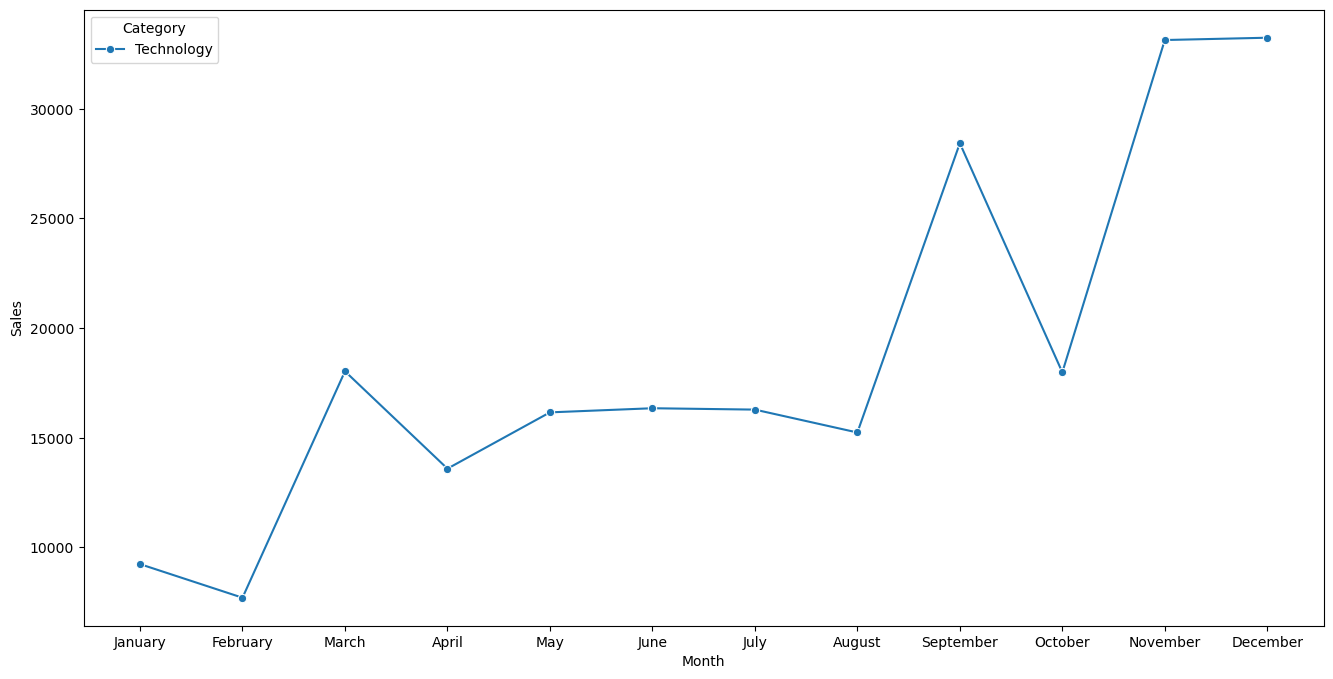

In [129]:
pivot_table = pd.pivot_table(df,index = ['Month'], columns= ['Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Month'],value_vars=['Technology'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Month' ,y= 'Sales',style = 'Category', markers = True, dashes = False)
plt.show()

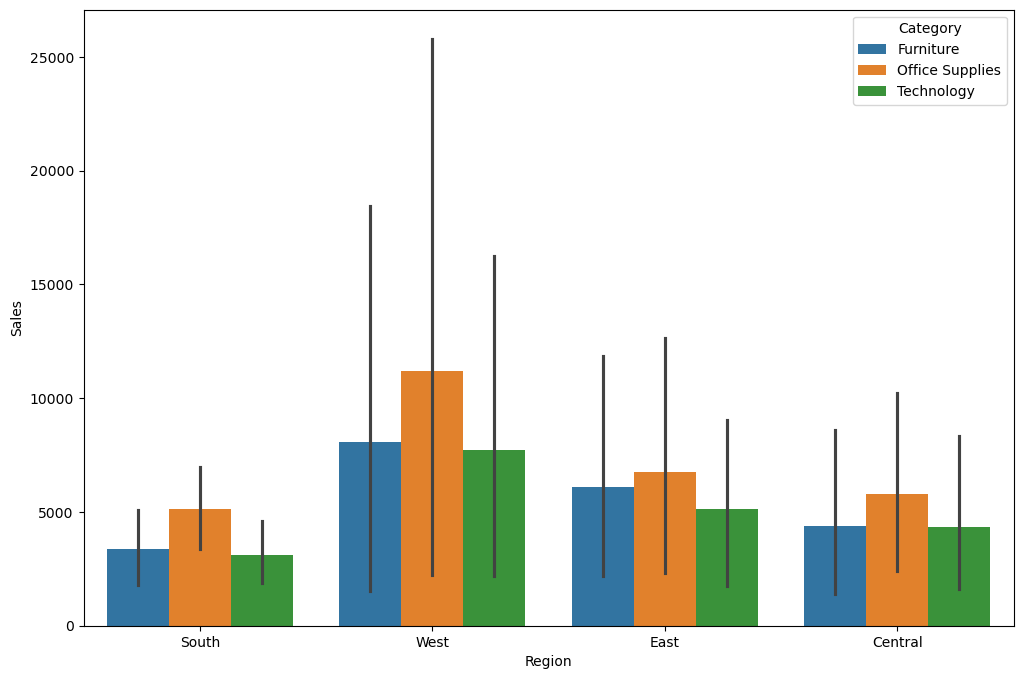

In [93]:
pv = df.pivot_table( index= ['State','Region'] , columns = 'Category', values = 'Sales',aggfunc = 'sum')
pv=pv.reset_index()
melted_df1d = pv.melt(id_vars=['State','Region'],value_vars=['Furniture','Office Supplies','Technology'],var_name= 'Category', value_name='Sales')
plt.figure(figsize=(12,8))
sns.barplot(data=melted_df1d, x= 'Region' ,y= 'Sales', hue = 'Category')
plt.show()

State
Arizona          20935.8050
Michigan         25603.5360
Florida          27572.4255
Illinois         35891.4590
Ohio             36112.0100
Washington       41204.6160
Pennsylvania     45393.3630
Texas            70585.8508
New York         90610.8130
California      169805.9015
Name: Sales, dtype: float64


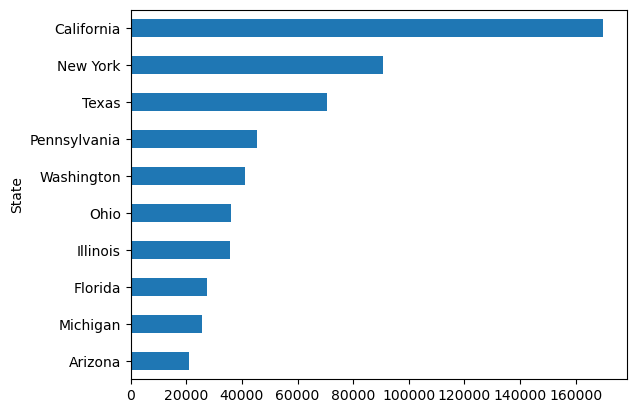

In [150]:
Top_Ten_States_by_Sales = df['Sales'].groupby(df['State']).sum().nlargest(10)
Top_Ten_States_by_Sales = Top_Ten_States_by_Sales.sort_values(ascending = True)
Top_Ten_States_by_Sales.plot.barh()
print(Top_Ten_States_by_Sales)

State
California        1286
New York           793
Texas              752
Pennsylvania       462
Illinois           406
Ohio               392
Washington         392
Florida            308
North Carolina     208
Michigan           204
Name: Sales, dtype: int64


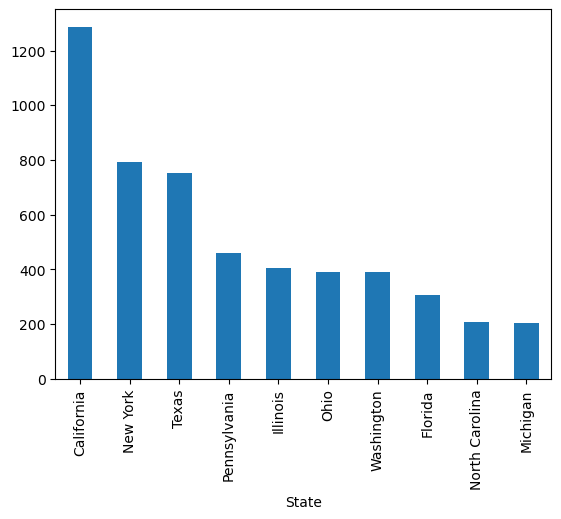

In [95]:
Top_Ten_States_by_No_of_Stores = df['Sales'].groupby(df['State']).nunique().nlargest(10)
Top_Ten_States_by_No_of_Stores.plot.bar()
print(Top_Ten_States_by_No_of_Stores)

State
North Dakota             215.150
District of Columbia     217.570
Vermont                  407.290
West Virginia            536.480
Maine                   1270.530
South Dakota            1315.560
Montana                 1463.382
Iowa                    1850.740
Nebraska                2333.910
Nevada                  2405.932
Name: Sales, dtype: float64


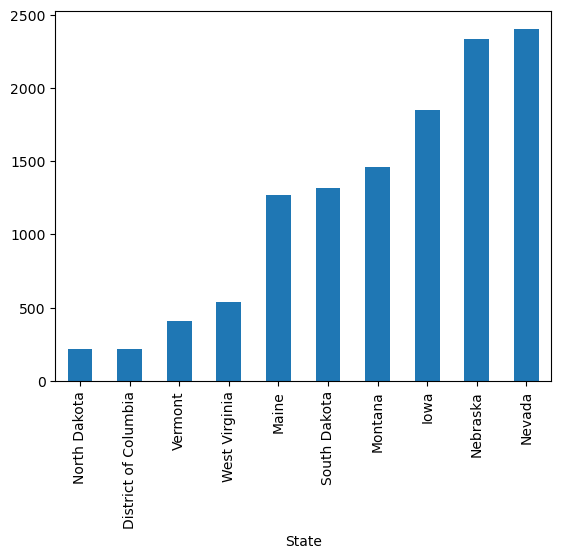

In [123]:
Least_Ten_States_by_Sales = df['Sales'].groupby(df['State']).sum().nsmallest(10)
Least_Ten_States_by_Sales.plot.bar()
print(Least_Ten_States_by_Sales)

State
North Dakota             215.150
District of Columbia     217.570
Vermont                  407.290
West Virginia            536.480
Maine                   1270.530
South Dakota            1315.560
Montana                 1463.382
Iowa                    1850.740
Nebraska                2333.910
Nevada                  2405.932
Name: Sales, dtype: float64


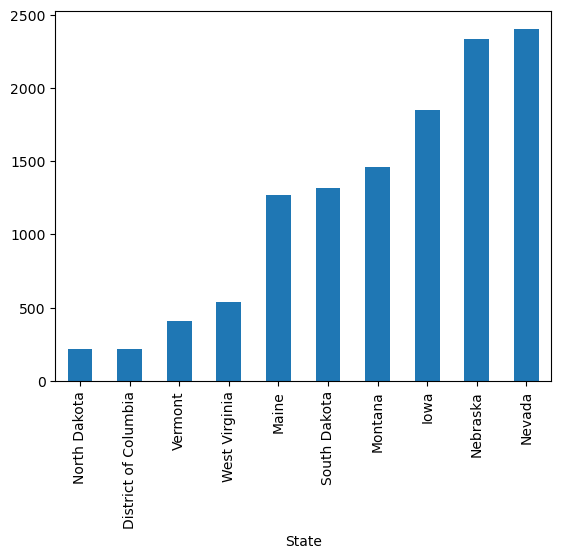

In [124]:
Least_Ten_States_by_No_of_Stores = df['City'].groupby(df['State']).nunique().nsmallest(10)
Least_Ten_States_by_Sales.plot.bar()
print(Least_Ten_States_by_Sales)

In [98]:
Sales_by_each_City_of_California = 169805.9015/1286
Sales_by_each_City_of_California

132.0419140746501

In [99]:
Top_Ten_States_by_Sales = df[df['Sales']==215.150].groupby(df['State'])
Top_Ten_States_by_Sales.plot.lineplot()
print(Top_Ten_States_by_Sales)

Sub-Category
Phones         116360.0900
Storage         93655.4840
Accessories     91726.9400
Chairs          91544.5390
Paper           74207.0540
Furnishings     67580.5060
Binders         59452.1830
Appliances      46720.7290
Tables          44075.8235
Bookcases       40169.5663
Name: Sales, dtype: float64


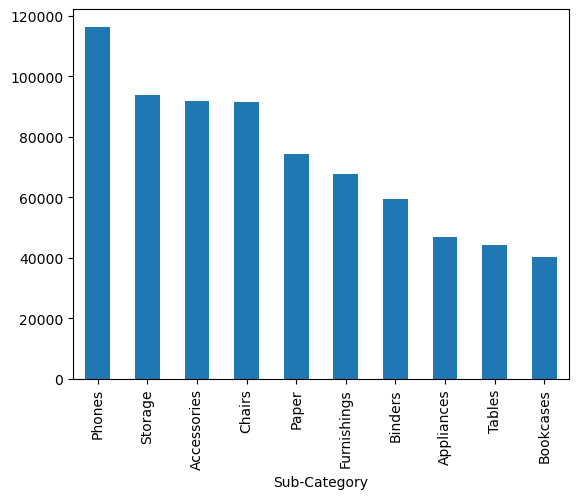

In [100]:
Top_Ten_Sub_Category_by_Sales = df['Sales'].groupby(df['Sub-Category']).sum().nlargest(10)
Top_Ten_Sub_Category_by_Sales.plot.bar()
print(Top_Ten_Sub_Category_by_Sales)

Sub-Category
Binders        1414
Paper          1334
Furnishings     901
Art             784
Storage         694
Accessories     690
Phones          668
Appliances      405
Chairs          385
Labels          355
Name: Sales, dtype: int64


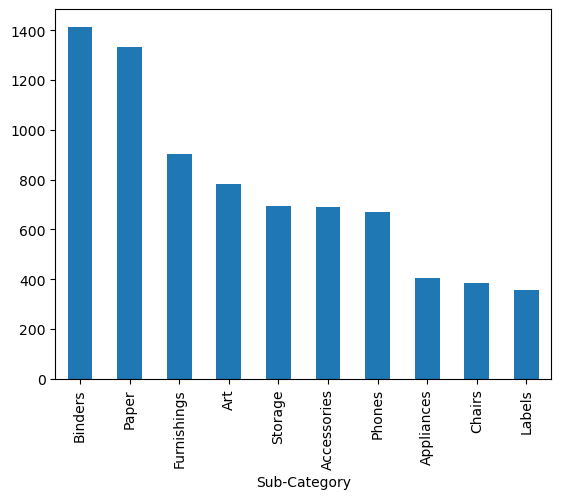

In [135]:
Top_Ten_Sub_Category_by_No_of_Orders = df['Sales'].groupby(df['Sub-Category']).count().nlargest(10)
Top_Ten_Sub_Category_by_No_of_Orders.plot.bar()
print(Top_Ten_Sub_Category_by_No_of_Orders)

Sub-Category
Fasteners      3001.9600
Copiers        4859.8380
Supplies       8893.5020
Labels        10932.0620
Machines      12465.3170
Envelopes     15523.3900
Art           25592.3860
Bookcases     40169.5663
Tables        44075.8235
Appliances    46720.7290
Name: Sales, dtype: float64


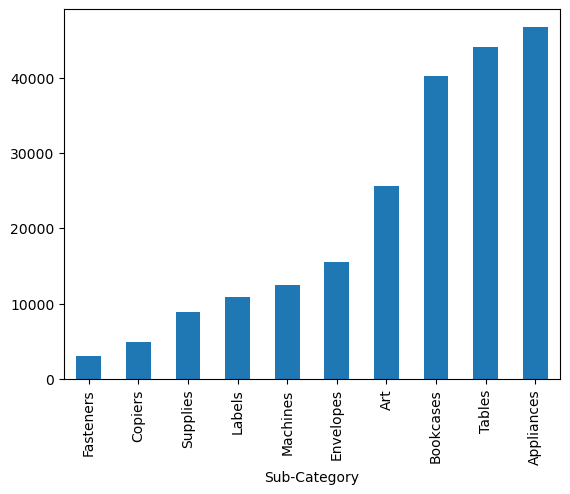

In [101]:
Least_Ten_Sub_Category_by_Sales = df['Sales'].groupby(df['Sub-Category']).sum().nsmallest(10)
Least_Ten_Sub_Category_by_Sales.plot.bar()
print(Least_Ten_Sub_Category_by_Sales)

Sub-Category
Copiers        11
Machines       50
Bookcases     164
Tables        169
Supplies      170
Fasteners     214
Envelopes     247
Labels        355
Chairs        385
Appliances    405
Name: Sales, dtype: int64


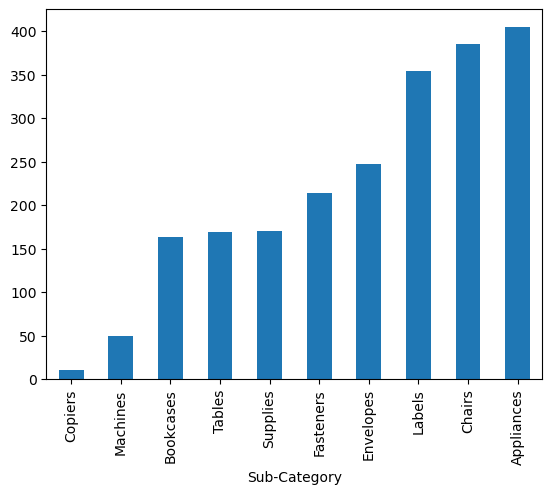

In [136]:
Least_Ten_Sub_Category_by_No_of_Orders = df['Sales'].groupby(df['Sub-Category']).count().nsmallest(10)
Least_Ten_Sub_Category_by_No_of_Orders.plot.bar()
print(Least_Ten_Sub_Category_by_No_of_Orders)

In [102]:
df['Sub-Category'].unique()

array(['Bookcases', 'Labels', 'Storage', 'Furnishings', 'Art', 'Binders',
       'Appliances', 'Paper', 'Phones', 'Chairs', 'Accessories',
       'Envelopes', 'Fasteners', 'Supplies', 'Tables', 'Machines',
       'Copiers'], dtype=object)

Sub-Category  Accessories  Appliances       Art    Binders   Bookcases  \
Year                                                                     
2015            18835.530    8224.767  4784.510  10916.950   7400.0336   
2016            17117.514    9349.615  6091.636  12278.735   9321.5970   
2017            24834.870   12971.657  5890.608  16308.441   9135.3803   
2018            30939.026   16174.690  8825.632  19948.057  14312.5554   

Sub-Category     Chairs   Copiers  Envelopes  Fasteners  Furnishings  \
Year                                                                   
2015          15594.922   479.984   3239.934    655.388    12815.106   
2016          19297.512  1839.944   4448.218    545.224    15658.600   
2017          26559.420   479.984   4456.664    946.274    18631.252   
2018          30092.685  2059.926   3378.574    855.074    20475.548   

Sub-Category    Labels  Machines      Paper     Phones    Storage  Supplies  \
Year                                       

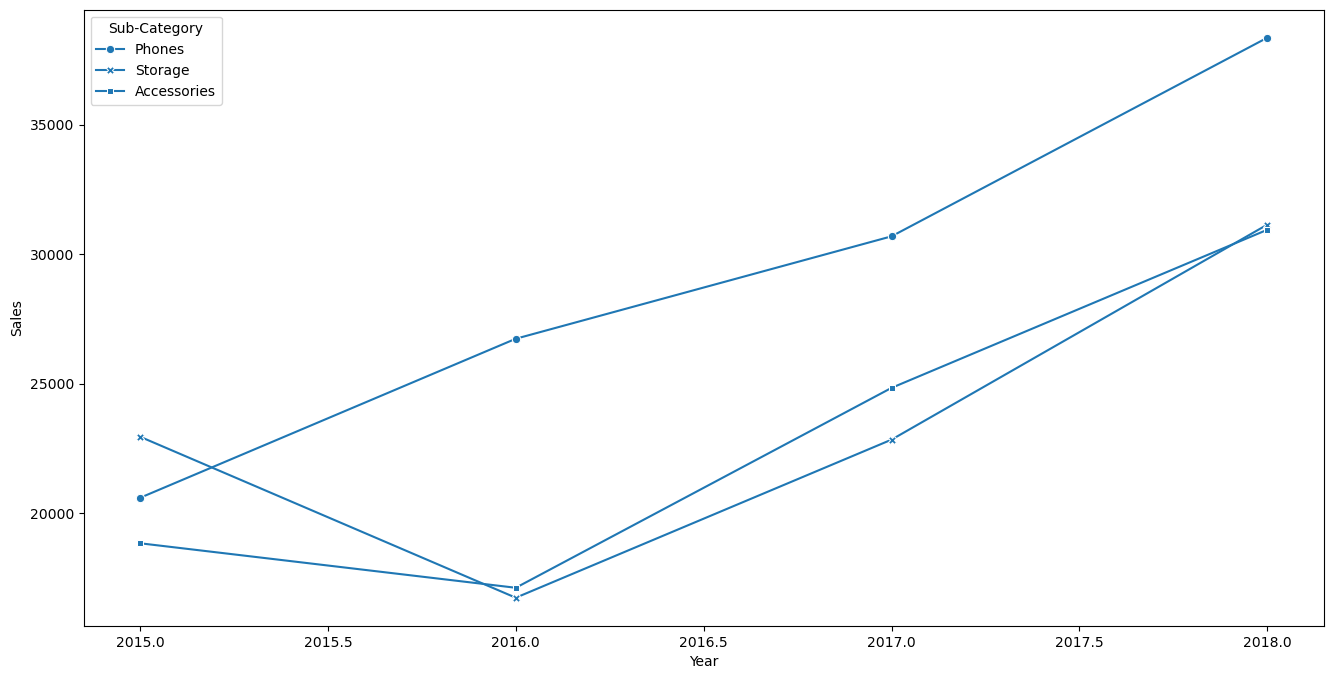

In [125]:
pivot_table = pd.pivot_table(df,index = ['Year'], columns= ['Sub-Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Year'],value_vars=['Phones','Storage','Accessories'],var_name= 'Sub-Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Year' ,y= 'Sales',style = 'Sub-Category', markers = True, dashes = False)
plt.show()

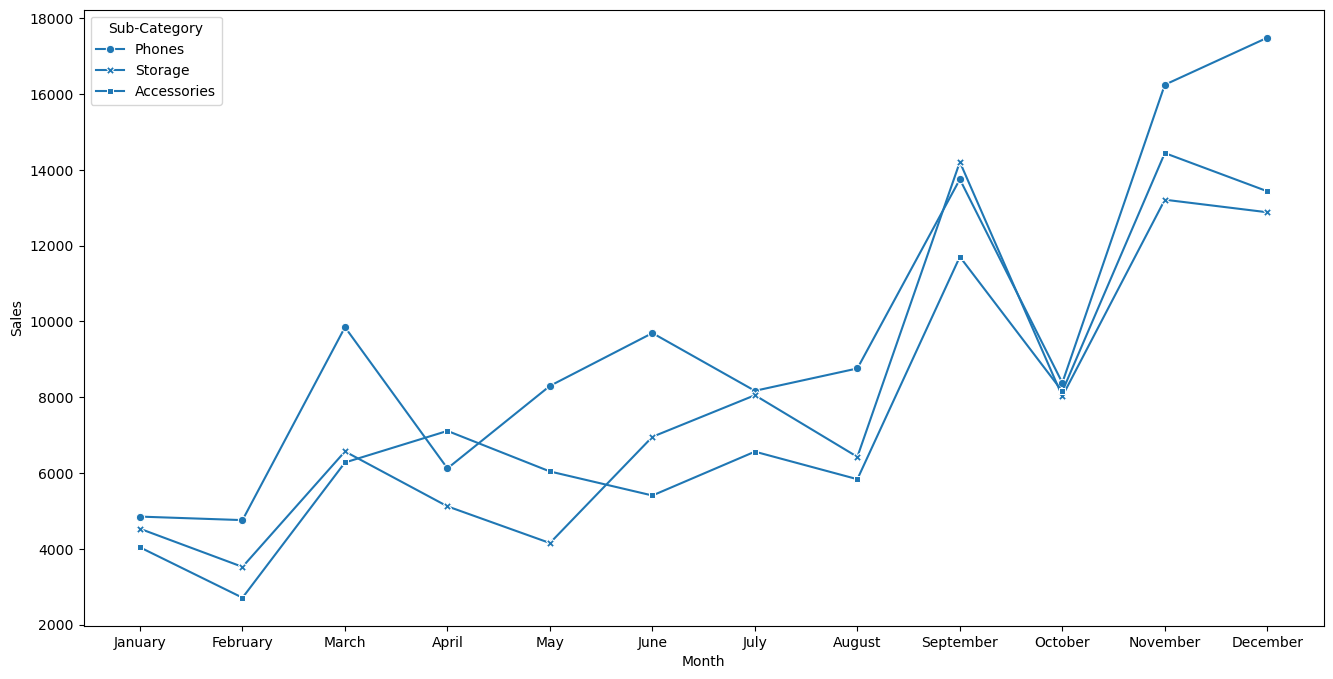

In [126]:
pivot_table = pd.pivot_table(df,index = ['Month'], columns= ['Sub-Category'],values='Sales',aggfunc = 'sum')
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Month'],value_vars=['Phones','Storage','Accessories'],var_name= 'Sub-Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Month' ,y= 'Sales',style = 'Sub-Category', markers = True, dashes = False)
plt.show()

Sub-Category  Accessories  Appliances       Art    Binders   Bookcases  \
Year                                                                     
2015            18835.530    8224.767  4784.510  10916.950   7400.0336   
2016            17117.514    9349.615  6091.636  12278.735   9321.5970   
2017            24834.870   12971.657  5890.608  16308.441   9135.3803   
2018            30939.026   16174.690  8825.632  19948.057  14312.5554   

Sub-Category     Chairs   Copiers  Envelopes  Fasteners  Furnishings  \
Year                                                                   
2015          15594.922   479.984   3239.934    655.388    12815.106   
2016          19297.512  1839.944   4448.218    545.224    15658.600   
2017          26559.420   479.984   4456.664    946.274    18631.252   
2018          30092.685  2059.926   3378.574    855.074    20475.548   

Sub-Category    Labels  Machines      Paper     Phones    Storage  Supplies  \
Year                                       

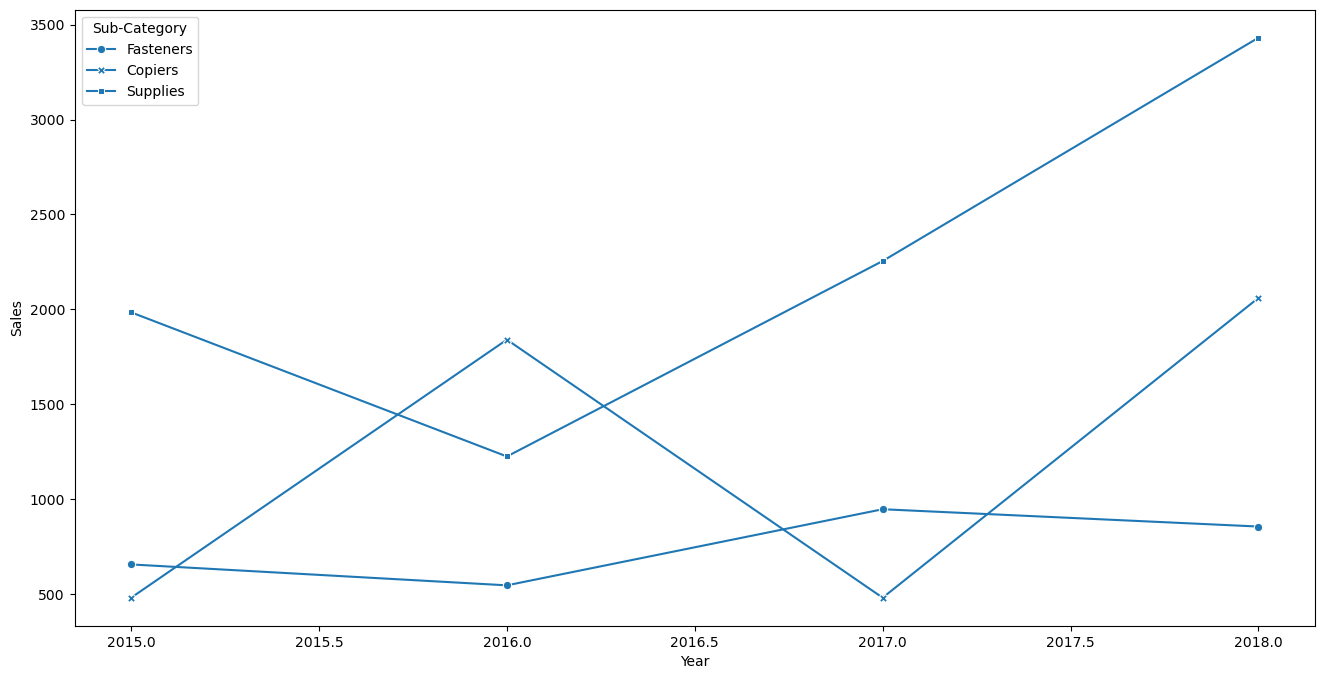

In [127]:
pivot_table = pd.pivot_table(df,index = ['Year'], columns= ['Sub-Category'],values='Sales',aggfunc = 'sum')
print(pivot_table)
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Year'],value_vars=['Fasteners','Copiers','Supplies'],var_name= 'Sub-Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Year' ,y= 'Sales',style = 'Sub-Category', markers = True, dashes = False)
plt.show()

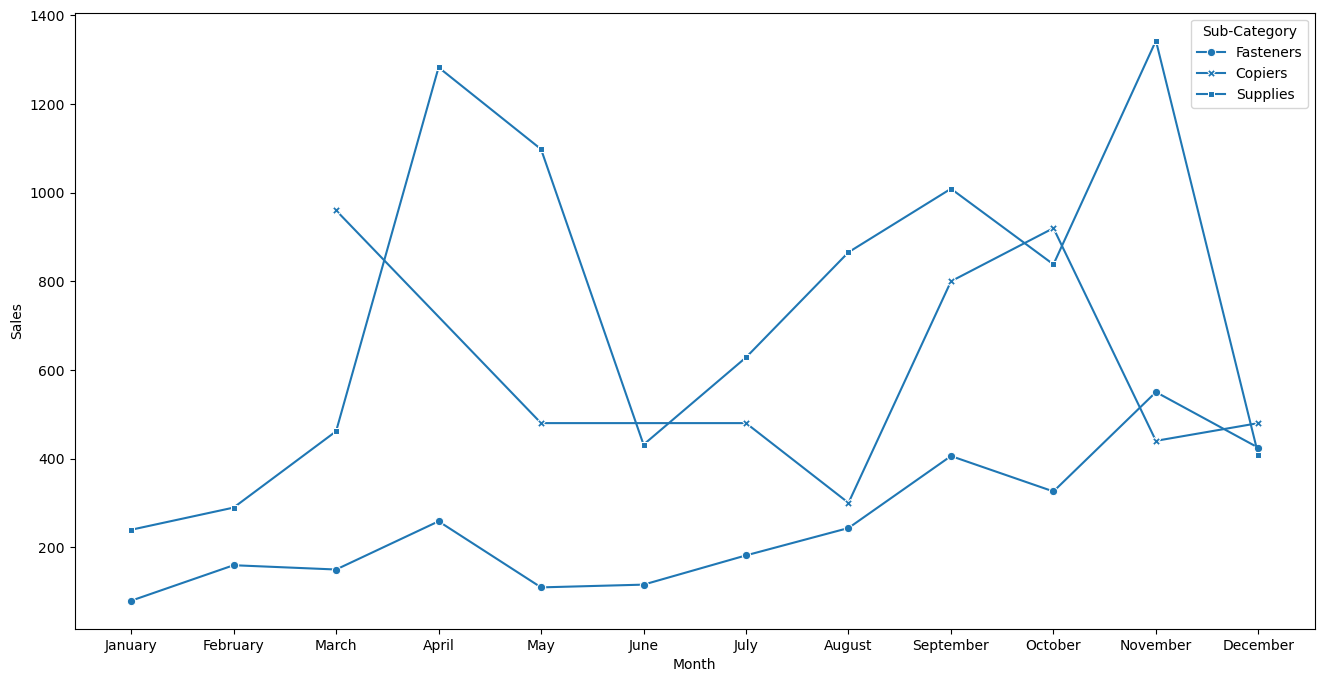

In [128]:
pivot_table = pd.pivot_table(df,index = ['Month'], columns= ['Sub-Category'],values='Sales',aggfunc = 'sum')
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
pivot_table = pivot_table.reindex(month_order, level = 'Month')
pivot_table = pivot_table.reset_index()
melted_df1 = pivot_table.melt(id_vars=['Month'],value_vars=['Fasteners','Copiers','Supplies'],var_name= 'Sub-Category', value_name='Sales')
plt.figure(figsize=(16,8))
sns.lineplot(data=melted_df1, x= 'Month' ,y= 'Sales',style = 'Sub-Category', markers = True, dashes = False)
plt.show()

                                                     Sales
Product Name                                              
Space Solutions HD Industrial Steel Shelving.     2345.388
Logitech Gaming G510s - Keyboard                  2362.722
Easy-staple paper                                 2414.156
Fellowes Officeware Wire Shelving                 2515.240
Ibico Hi-Tech Manual Binding System               2653.413
Nortel Meridian M3904 Professional Digital phone  2802.618
Global High-Back Leather Tilter, Burgundy         2841.069
Situations Contoured Folding Chairs, 4/Set        2959.866
Global Wood Trimmed Manager's Task Chair, Khaki   3621.004
KI Adjustable-Height Table                        3950.781


<Axes: ylabel='Product Name'>

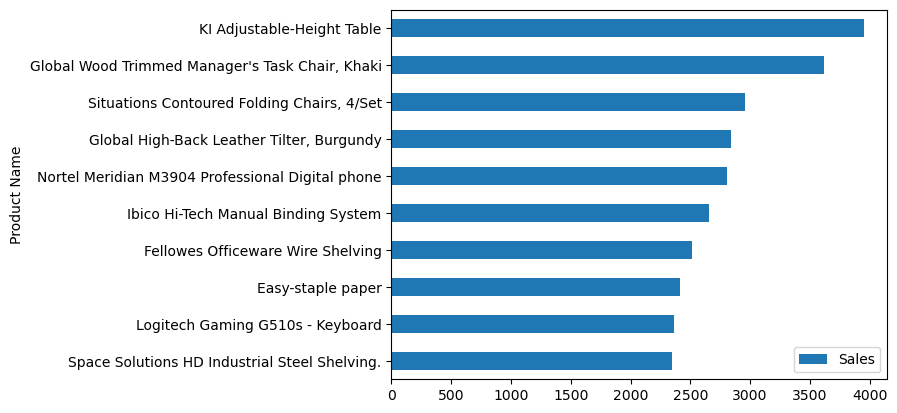

In [213]:
Product_by_Sales = pd.pivot_table(df, index = 'Product Name', values = 'Sales', aggfunc = 'sum')
Product_by_Sales = Product_by_Sales.sort_values(ascending = True, by ='Sales')
Top_Ten_Product_by_Sales = Product_by_Sales[1744:]
print(Top_Ten_Product_by_Sales)
Top_Ten_Product_by_Sales.plot.barh()

                                                    Sales
Product Name                                             
Eureka Disposable Bags for Sanitaire Vibra Groo...  1.624
Avery 5                                             5.760
Xerox 20                                            6.480
Grip Seal Envelopes                                 7.072
Acme Serrated Blade Letter Opener                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlig...  7.800
Xerox 1989                                          7.968
4009 Highlighters                                   8.040
Stockwell Gold Paper Clips                          8.096


<Axes: ylabel='Product Name'>

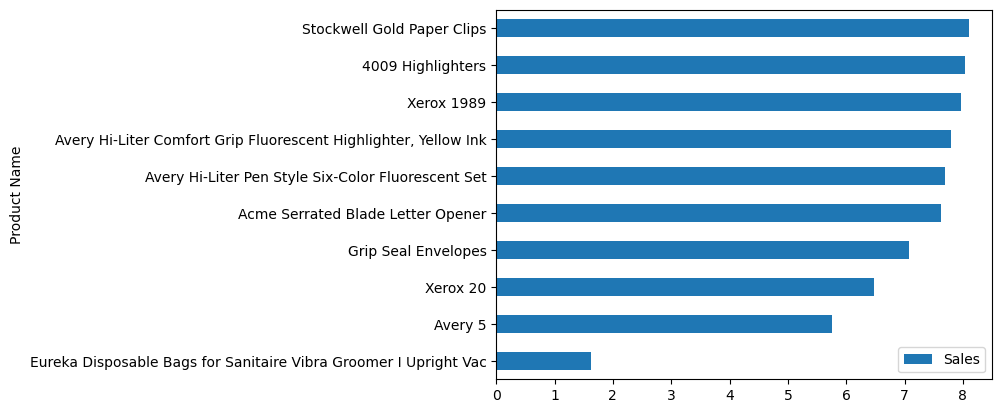

In [212]:
Product_by_Sales = pd.pivot_table(df, index = 'Product Name', values = 'Sales', aggfunc = 'sum')
Product_by_Sales = Product_by_Sales.sort_values(ascending = True, by ='Sales')
Top_Ten_Product_by_Sales = Product_by_Sales[:10]
print(Top_Ten_Product_by_Sales)
Top_Ten_Product_by_Sales.plot.barh()

Region
Central    180207.3958
East       229351.9580
South      127524.8815
West       269677.1345
Name: Sales, dtype: float64


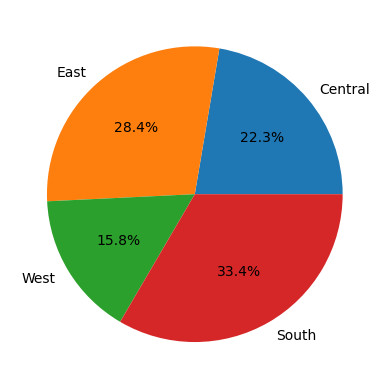

In [240]:
Sales_by_Region = df['Sales'].groupby(df['Region']).sum()
print(Sales_by_Region)
Region = ['Central','East','West','South']
plt.pie(Sales_by_Region, labels = Region, autopct = '%1.1f%%')
plt.show()

In [241]:
df.to_csv('Cleaned_Superstore_Sales.csv')

In [ ]:
# Thanks